<a href="https://colab.research.google.com/github/amanrock005/aman_solved_code/blob/master/feedforward_nn_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from imblearn.over_sampling import RandomOverSampler

In [56]:
tf.__version__

'2.8.2'

In [57]:
df = pd.read_csv("diabetes.csv")

In [58]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [59]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [60]:
df[df['Outcome']==1]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
2,8,183,64,0,0,23.3,0.672,32,1
4,0,137,40,35,168,43.1,2.288,33,1
6,3,78,50,32,88,31.0,0.248,26,1
8,2,197,70,45,543,30.5,0.158,53,1
...,...,...,...,...,...,...,...,...,...
755,1,128,88,39,110,36.5,1.057,37,1
757,0,123,72,0,0,36.3,0.258,52,1
759,6,190,92,0,0,35.5,0.278,66,1
761,9,170,74,31,0,44.0,0.403,43,1


In [61]:
len(df[df['Outcome']==1]), len(df[df['Outcome']==0])

(268, 500)

In [62]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
data = np.hstack((X, np.reshape(Y, (-1,1))))
transform_df = pd.DataFrame(data,columns=df.columns)

In [63]:
over = RandomOverSampler()
X,Y = over.fit_resample(X,Y)
data = np.hstack((X, np.reshape(Y, (-1,1))))
transform_df = pd.DataFrame(data,columns=df.columns)

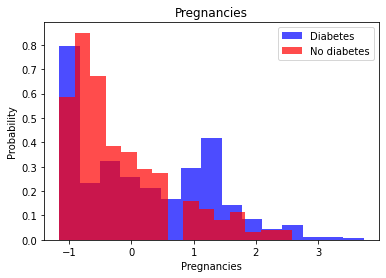

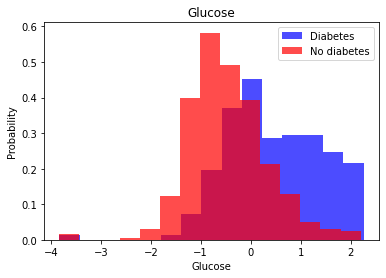

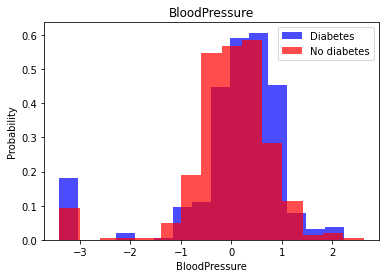

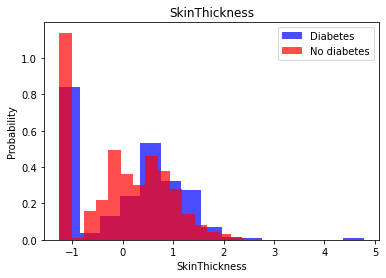

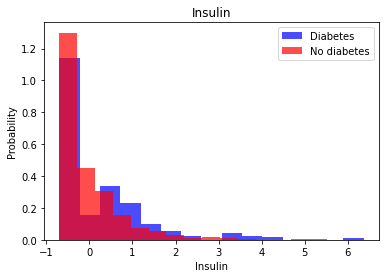

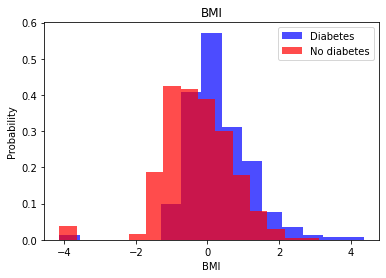

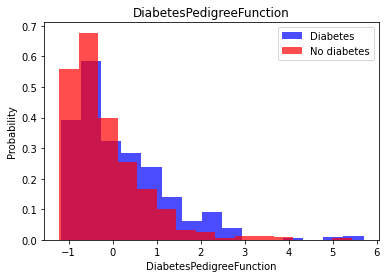

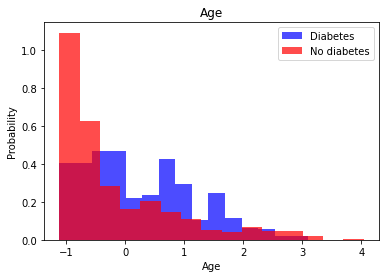

In [64]:
for i in range(len(df.columns[:-1])):
  label = df.columns[i]
  plt.hist(transform_df[transform_df['Outcome']==1][label], color='blue', label="Diabetes", alpha=0.7,density=True,bins=15)
  plt.hist(transform_df[transform_df['Outcome']==0][label], color='red', label="No diabetes", alpha=0.7,density=True,bins=15)
  plt.title(label)
  plt.ylabel('Probability')
  plt.xlabel(label)
  plt.legend()
  plt.show()

In [65]:
X = df[df.columns[:-1]].values
Y = df[df.columns[-1]].values

In [66]:
X

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [67]:
Y

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,

In [68]:
X.shape, Y.shape

((768, 8), (768,))

In [69]:
len(transform_df[transform_df["Outcome"]==1]), len(transform_df[transform_df["Outcome"]==0])

(500, 500)

In [70]:
X_train, X_temp, Y_train, Y_temp = train_test_split(X,Y,test_size=0.4, random_state=0)
X_valid, X_test, Y_valid, Y_test = train_test_split(X_temp,Y_temp, test_size=0.5, random_state=0)

In [71]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(16,activation='relu'),
    #16 layers in the neurons
    #if x<=0 then 0 else x>0 then x
    tf.keras.layers.Dense(16,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid') 
    #sigmoid is used for binary classification
])

In [72]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [73]:
model.evaluate(X_train,Y_train)

15/15 [==============================] - 0s 1ms/step - loss: 14.8285 - accuracy: 0.3609


[14.828487396240234, 0.36086955666542053]

In [74]:
model.evaluate(X_valid, Y_valid)

5/5 [==============================] - 0s 2ms/step - loss: 14.9015 - accuracy: 0.3506


[14.901505470275879, 0.350649356842041]

In [75]:
model.fit(X_train, Y_train, batch_size=16, epochs=20, validation_data=(X_valid,Y_valid))

Epoch 1/20
29/29 [==============================] - 1s 4ms/step - loss: 5.1761 - accuracy: 0.5043 - val_loss: 1.8938 - val_accuracy: 0.6104
Epoch 2/20
29/29 [==============================] - 0s 3ms/step - loss: 1.3324 - accuracy: 0.6196 - val_loss: 1.2840 - val_accuracy: 0.5714
Epoch 3/20
29/29 [==============================] - 0s 3ms/step - loss: 1.1675 - accuracy: 0.6196 - val_loss: 1.1613 - val_accuracy: 0.5519
Epoch 4/20
29/29 [==============================] - 0s 2ms/step - loss: 1.0973 - accuracy: 0.6261 - val_loss: 1.3253 - val_accuracy: 0.4805
Epoch 5/20
29/29 [==============================] - 0s 2ms/step - loss: 1.0957 - accuracy: 0.6065 - val_loss: 1.2053 - val_accuracy: 0.5130
Epoch 6/20
29/29 [==============================] - 0s 3ms/step - loss: 1.0347 - accuracy: 0.6239 - val_loss: 0.9969 - val_accuracy: 0.6039
Epoch 7/20
29/29 [==============================] - 0s 3ms/step - loss: 0.9771 - accuracy: 0.6174 - val_loss: 1.0396 - val_accuracy: 0.5584
Epoch 8/20
29/29 [==

In [76]:
model.evaluate(X_test, Y_test)

5/5 [==============================] - 0s 2ms/step - loss: 0.6520 - accuracy: 0.7078


[0.6519504189491272, 0.7077922224998474]

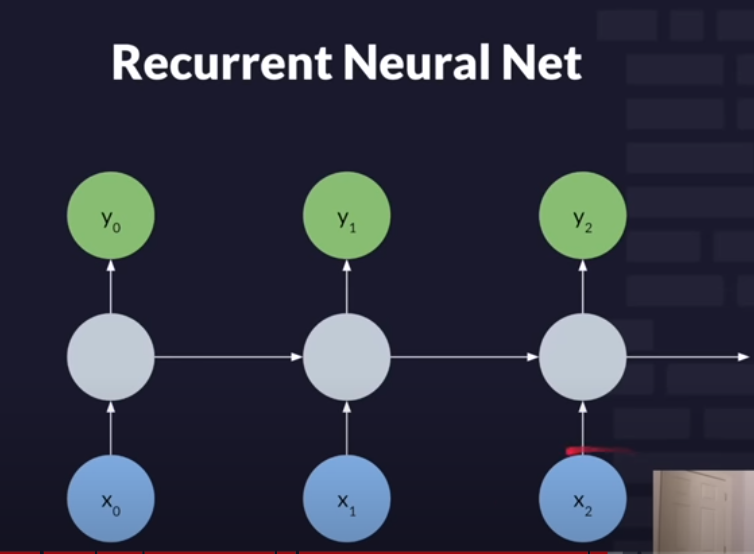